In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
online_retails = pd.read_excel('online-retails.xlsx')
online_retails_copy = online_retails.copy(deep=True)

# Data Inspection

In [56]:
online_retails_copy.shape[0]

401604

In [5]:
online_retails_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
online_retails_copy.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
online_retails_copy.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
409997,572086,23489,"GARLAND, VINTAGE BELLS",6,2011-10-20 14:30:00,2.89,13897.0,United Kingdom
279018,561223,22815,CARD PSYCHEDELIC APPLES,12,2011-07-26 09:51:00,0.42,15358.0,United Kingdom
191142,553340,48187,DOORMAT NEW ENGLAND,10,2011-05-16 12:20:00,6.75,15125.0,United Kingdom
5582,536865,21733,RED HANGING HEART T-LIGHT HOLDER,3,2010-12-03 11:28:00,5.91,NaN,United Kingdom
263449,559989,21658,GLASS BEURRE DISH,4,2011-07-14 12:21:00,3.95,13319.0,United Kingdom


In [8]:
online_retails_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
stats= online_retails_copy.describe()

In [10]:
stats

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
Q1_Quantity = stats.Quantity['25%']
Q3_Quantity = stats.Quantity['75%']

In [12]:
IQR_Quantity = Q3_Quantity-Q1_Quantity
IQR_Quantity

9.0

In [13]:
lower_bound_quantity = Q1_Quantity-1.5*IQR_Quantity
upper_bound_quantity = Q3_Quantity+1.5*IQR_Quantity
print(lower_bound_quantity)
print(upper_bound_quantity)

-12.5
23.5


In [14]:
Q1_unit = stats.Quantity['25%']
Q3_unit = stats.Quantity['75%']
IQR_unit = Q3_unit-Q1_unit
IQR_unit
lower_bound_unit = Q1_unit-1.5*IQR_unit
upper_bound_unit = Q3_unit+1.5*IQR_unit
print(lower_bound_unit)
print(upper_bound_unit)

-12.5
23.5


# Missing Data Handling and cleaning

In [16]:
(online_retails_copy.isnull().sum()/online_retails_copy.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [17]:
online_retails_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
online_retails_copy = online_retails_copy.dropna(subset = ['CustomerID', 'Description'])

In [19]:
online_retails_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
online_retails_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [21]:
# online_retails_copy['CustomerID'] = online_retails_copy['CustomerID'].astype('float64')
online_retails_copy.loc[:, 'CustomerID'] = online_retails_copy['CustomerID'].astype('int64')

In [22]:
online_retails_copy['CustomerID']

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 406829, dtype: float64

In [23]:
online_retails_copy['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [24]:
online_retails_copy.duplicated().sum()

5225

In [25]:
online_retails_copy.drop_duplicates(inplace = True)

In [26]:
online_retails_copy.shape

(401604, 8)

# Data Visualisation

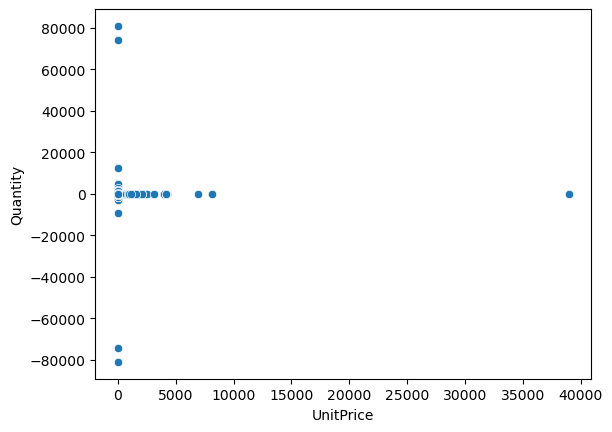

In [28]:
# unit price and quantity
sns.scatterplot(data = online_retails_copy, x='UnitPrice', y='Quantity')
plt.show()

In [ ]:
online_retails_copy[online_retails_copy['Quantity']<0]